1 Opérations de base d'un réseau ConvNet

In [22]:
#Demander n, m 
n = int(input("Entrer la valeur n:"))
m = int(input("Entrer la valeur m:"))

In [23]:
#Remplir aléatoirement l'image I de taille nxn entre 0 et 255
import numpy as np
I = np.random.randint(0, 256, (n, n))
print("Image I:")
print(I)

Image I:
[[ 20 171 181  80 166  81 147 164 100 227]
 [173   5  10 239  59  53  99 142 146  89]
 [181  60 219 140  69  31 211 142 133  53]
 [ 19 108  14 255 165  96 157  25  32 170]
 [144  65 223  60 116 103 167 117 195 251]
 [103  32  21 137 182 225  62 201 176  16]
 [ 78 219 168 113  61 143  21  88 132 237]
 [151 123  28 103 230  93  10 170  86 107]
 [131 138 149 177  73 160  95 197  61 202]
 [ 13  59  96   3  77  63 214  42 142 247]]


In [24]:
#Normaliser l'image I entre 0 et 1
I_normalized = I / 255.0
print("Image I normalisée:")
print(I_normalized)

Image I normalisée:
[[0.07843137 0.67058824 0.70980392 0.31372549 0.65098039 0.31764706
  0.57647059 0.64313725 0.39215686 0.89019608]
 [0.67843137 0.01960784 0.03921569 0.9372549  0.23137255 0.20784314
  0.38823529 0.55686275 0.57254902 0.34901961]
 [0.70980392 0.23529412 0.85882353 0.54901961 0.27058824 0.12156863
  0.82745098 0.55686275 0.52156863 0.20784314]
 [0.0745098  0.42352941 0.05490196 1.         0.64705882 0.37647059
  0.61568627 0.09803922 0.1254902  0.66666667]
 [0.56470588 0.25490196 0.8745098  0.23529412 0.45490196 0.40392157
  0.65490196 0.45882353 0.76470588 0.98431373]
 [0.40392157 0.1254902  0.08235294 0.5372549  0.71372549 0.88235294
  0.24313725 0.78823529 0.69019608 0.0627451 ]
 [0.30588235 0.85882353 0.65882353 0.44313725 0.23921569 0.56078431
  0.08235294 0.34509804 0.51764706 0.92941176]
 [0.59215686 0.48235294 0.10980392 0.40392157 0.90196078 0.36470588
  0.03921569 0.66666667 0.3372549  0.41960784]
 [0.51372549 0.54117647 0.58431373 0.69411765 0.28627451 0.6

In [25]:
#Remplir aléatoirement le filtre W de taille mxm entre -1 et 1
W = np.random.uniform(-1, 1, (m, m))
print("Filtre W:")
print(W)

Filtre W:
[[ 0.13089721 -0.62383681  0.24960251  0.41809813 -0.61075553  0.58222953]
 [-0.54592628  0.826705   -0.71690746  0.76820115 -0.44997395 -0.1737867 ]
 [ 0.47566865 -0.13109126  0.50712789 -0.9727128   0.71881065 -0.25024535]
 [ 0.86269235 -0.22130919  0.24806285  0.92165297 -0.58811297  0.21483287]
 [ 0.33806954 -0.83746351 -0.20685104  0.69945724  0.92286153  0.6795691 ]
 [-0.03382779  0.00637034 -0.7328071  -0.65131148  0.70432114  0.5689057 ]]


In [26]:
#Calcule de la matrice de la convolution (fomule = somme I[i+num1][j+num2]*W[num1][num2]  pour num1 et num2 de 0 à m-1)
#puis ajout du biais 1.0
#application de la fonction d'activation sigmoïde (sigmoïde(x) = 1/(1+exp(-x)))

taille_conv = n - m + 1
conv_matrix = np.zeros((taille_conv, taille_conv))
biais = 1.0
for num1 in range(taille_conv):
    for num2 in range(taille_conv):
        for num11 in range(m):
            for num22 in range(m):
                conv_matrix[num1, num2] += I_normalized[num1 + num11, num2 + num22] * W[num11, num22]
                val = conv_matrix[num1, num2] + biais
                conv_matrix[num1, num2] = 1 / (1 + np.exp(-val))
print("Matrice de convolution après application du biais et de la fonction sigmoïde:")
print(conv_matrix)

Matrice de convolution après application du biais et de la fonction sigmoïde:
[[0.91778502 0.88658404 0.91077354 0.90959084 0.87464373]
 [0.90011777 0.8754805  0.88726159 0.89889427 0.91902077]
 [0.89371217 0.87062278 0.90407866 0.89120165 0.89322148]
 [0.90355958 0.89271193 0.91112171 0.88601283 0.9110956 ]
 [0.88379456 0.91371287 0.88216129 0.89906202 0.92087564]]


In [27]:
#Ajouter une couche de pooling (prendre la fonction max comme fonction de pooling).
#Il y aurait une petite précaution à prendre dans le cas ou taille_conv est impair

taille_pool = int(taille_conv/2) 

pool = np.zeros((taille_pool, taille_pool))

for num1 in range(taille_pool):
    for num2 in range(taille_pool):
        val = max(conv_matrix[2*num1,2*num2],conv_matrix[2*num1,2*num2+1],conv_matrix[2*num1+1,2*num2],conv_matrix[2*num1+1,2*num2+1])
        pool[num1,num2] = val
print("Matrice après pooling:")
print(pool)

Matrice après pooling:
[[0.91778502 0.91077354]
 [0.90355958 0.91112171]]


2 - Récupération et étude des données MNIST

In [28]:
#1. Rcupérez les données MNIST
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
#Récupération et étude des données

data = mnist.load_data()

In [29]:
#2 - Pour chaque composante des données vérifiez ses dimensions, le type de son contenu et les valeurs extrêmales.
data1 = data[0]
data2 = data[1]

print (type(data1))
print(len(data1))

print (type(data2))
print(len(data2))

<class 'tuple'>
2
<class 'tuple'>
2


In [30]:
#Le type
data11 = data1[0]
data12 = data1[1]

data21 = data2[0]
data22 = data2[1]

print(type(data11))
print(type(data12))
print(type(data21))
print(type(data22))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [31]:
#Dimensions
print(np.shape(data11))
print(np.shape(data12))
print(np.shape(data21))
print(np.shape(data22))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


60 000 images de tailles 28x28 (Train)
10 000 images de tailles 28x28 (Test)

In [32]:
#valeurs extrêmales
print(np.min(data11))
print(np.max(data11))

0
255


In [33]:
#valeurs extrêmales
print(np.min(data12))
print(np.max(data12))

0
9


In [34]:
#valeurs extrêmales
print(np.min(data21))
print(np.max(data21))

0
255


In [35]:
#valeurs extrêmales
print(np.min(data22))
print(np.max(data22))

0
9


In [36]:
#3 - Transformez l'ensemble des images d'apprentissage (resp. de test) en une seule matrice de réels compris entre 0 et 1

# Conversion en float et normalisation dans [0,1]
X_train = data11.astype('float32') / 255.0
X_test  = data21.astype('float32') / 255.0

# Aplatir chaque image en un vecteur de 28*28 = 784 valeurs
X_train = X_train.reshape((X_train.shape[0], -1))
X_test  = X_test.reshape((X_test.shape[0], -1))

# Vérifications
print("X_train shape:", X_train.shape, "dtype:", X_train.dtype, "min:", X_train.min(), "max:", X_train.max())
print("X_test  shape:", X_test.shape,  "dtype:", X_test.dtype,  "min:", X_test.min(),  "max:", X_test.max())

print("Labels shapes (train, test):", data12.shape, data22.shape)
if X_train.shape[0] != data12.shape[0] or X_test.shape[0] != data22.shape[0]:
    raise ValueError("Mismatch entre le nombre d'images et d'étiquettes")

X_train shape: (60000, 784) dtype: float32 min: 0.0 max: 1.0
X_test  shape: (10000, 784) dtype: float32 min: 0.0 max: 1.0
Labels shapes (train, test): (60000,) (10000,)


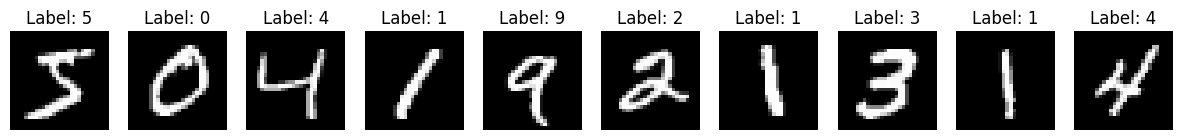

In [37]:
#4. Visualisez quelques images
nb_images_display = 10
fig, axes = plt.subplots(1, nb_images_display, figsize=(15,5))
for i in range(nb_images_display):
    axes[i].imshow(data11[i], cmap='gray')
    axes[i].set_title(f"Label: {data12[i]}")
    axes[i].axis('off')


3 - Keras/Tensorow : un premier exemple

In [38]:
#Fabriquez un réseau de neurones ayant deux couches cachées adaptée à un ensemble de donnéees 
# dont la sortie est binaire et testez le sur le dataset Pima Indians onset of diabetes dataset

import numpy as np
import pandas as pd

data = pd.read_csv("h:\Desktop\File\pima-indians-diabetes.csv")
data.head()

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_2680\381458065.py:7: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("h:\Desktop\File\pima-indians-diabetes.csv")


,X1,X2,X3,X4,X5,X6,X7,X8,Cls
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
#nettoyer les données (valeurs manquants)
data.replace(0, np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)


,X1,X2,X3,X4,X5,X6,X7,X8,Cls
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1.0
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,1.0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1.0
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,1.0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63,1.0
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27,1.0
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30,1.0
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1.0


In [40]:
#Normalisation/Standardisation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop("Outcome", axis=1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


KeyError: "['Outcome'] not found in axis"

4 - Keras/Tensorow : notre premier réseau ConvNet

In [ ]:
#1. Chargez la base mnist des chiffres manuscrits
from tensorflow.keras.datasets import mnist

#  et en extraire 1000 exemples pour l'apprentissage et 100 exemples pour le test
(X_train_1000, Y_train_1000), (X_test_100, Y_test_100) = mnist.load_data()
X_train_1000 = X_train_1000[:1000]
Y_train_1000 = Y_train_1000[:1000]
X_test_100 = X_test_100[:100]
Y_test_100 = Y_test_100[:100]

print("X_train_1000:", X_train_1000.shape, "Y_train_1000:", Y_train_1000.shape)
print("X_test_100:", X_test_100.shape, "Y_test_100:", Y_test_100.shape)

X_train_1000: (1000, 28, 28) Y_train_1000: (1000,)
X_test_100: (100, 28, 28) Y_test_100: (100,)


In [ ]:
#2 Transformez les ensembles d'apprentissage et de test en tenseurs de dimension 4 : 
# nombre_images X largeur X longueur X 1 (cette transformation est supposée par le traitement qui va suivre).

X_train = X_train_1000.reshape((X_train_1000.shape[0], X_train_1000.shape[1], X_train_1000.shape[2],1))
X_test = X_test_100.reshape((X_test_100.shape[0], X_test_100.shape[1], X_test_100.shape[2],1))

In [ ]:
#3. Normalisez les niveaux de gris pour les ramener entre 0 et 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
#4 Transformez les données y test et y train en données qualitatives (ayant donc autant de
#  modalitées qu'il y a de chiffres, cette transformation est supposée par le traitement qui va suivre).

from tensorflow.keras.utils import to_categorical

Y_train_1000 = to_categorical(Y_train_1000, 10)
Y_test_100 = to_categorical(Y_test_100, 10)

In [ ]:
#5. Créez un réseau de neurones convolutionnel avec dans l'ordre la couche d'entrée,
# une couche convolutionnelle, une deuxième couche convolutionnelle, une couche
# Pooling, une couche Dropout, une couche Flatten, une couche Dense, une deuxième
# couche Dropout, la couche de sortie.

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#6. Affichez une description du réseau et vérifier la cohérence de cette description.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#7. Complétez le programme en ajoutant la compilation, l'apprentissage et l'évaluation.

#compilation 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#apprentissage
model.fit(X_train, Y_train_1000, batch_size=32, epochs=10, verbose=1)

#évaluation
score = model.evaluate(X_test, Y_test_100, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5310 - loss: 1.4306
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7940 - loss: 0.6379
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8770 - loss: 0.4069
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9130 - loss: 0.2981
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9310 - loss: 0.2309
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9450 - loss: 0.1601
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9690 - loss: 0.1150
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9640 - loss: 0.1086
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9740 - loss: 0.0781
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9780 - loss: 0.0654
Test loss: 0.07336999475955963
Test accuracy: 0.9800000190734863
